# The Business Case:
One of the goals of marketing is to understand the customer's needs and the characteristics of the customer's type.
if a dataset is available, data science can be applied to customer segmentation. This is our goal here.

# Importing Libraries

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans

# Here's some features from dataset

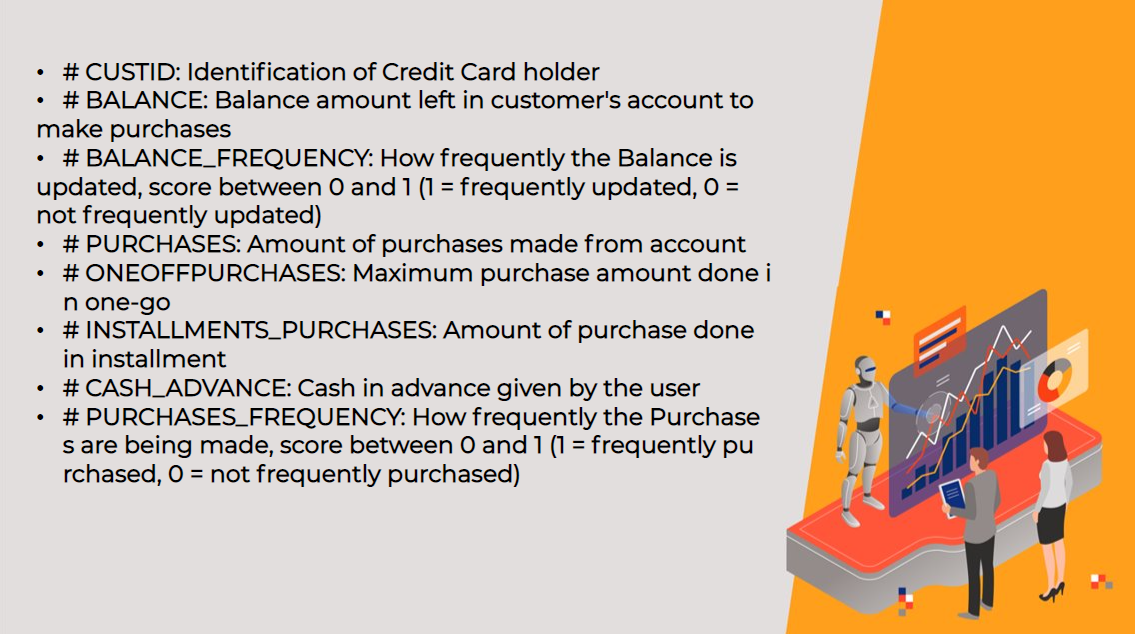

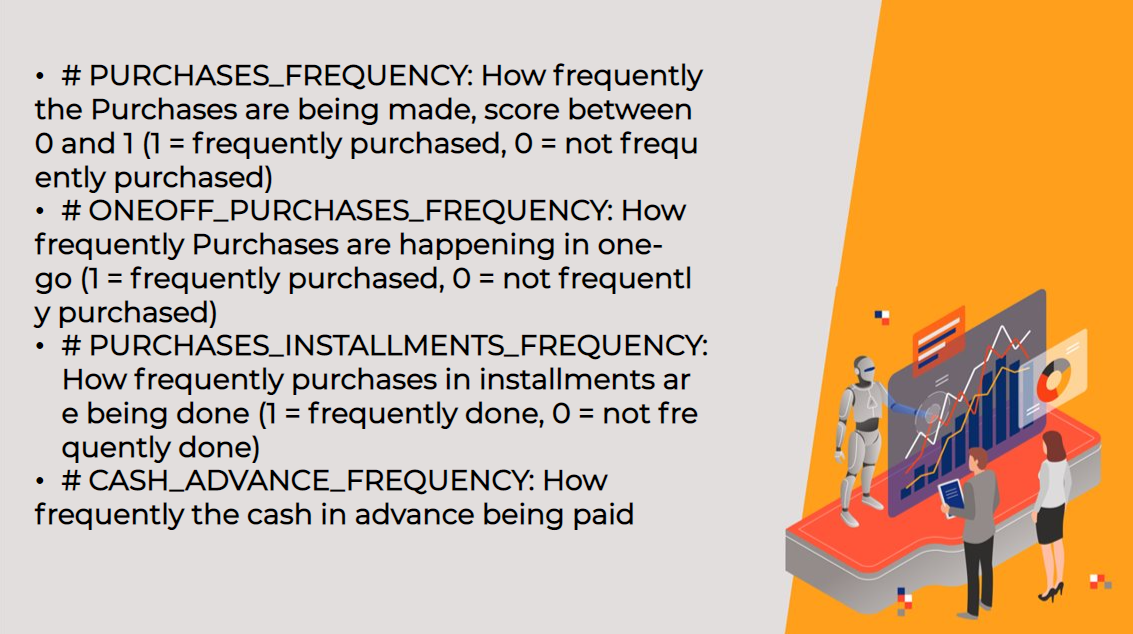

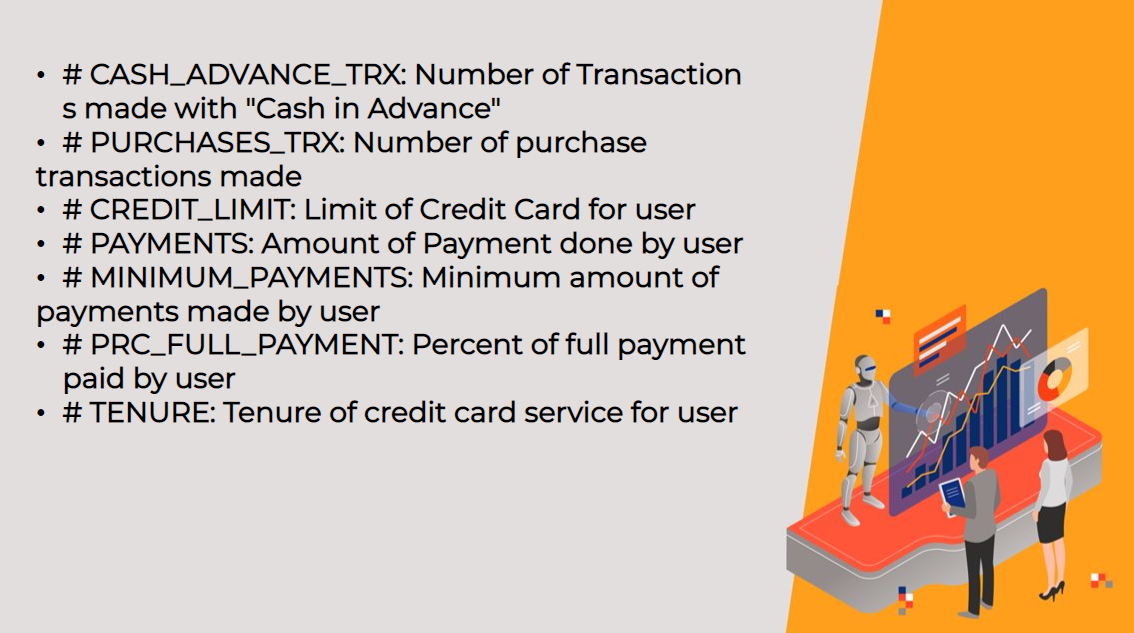

In [43]:
data = pd.read_csv("Marketing_data.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [8]:
data['BALANCE_FREQUENCY'].describe()

count    8950.000000
mean        0.877271
std         0.236904
min         0.000000
25%         0.888889
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64

In [11]:
data['PURCHASES_FREQUENCY'].describe()

count    8950.000000
mean        0.490351
std         0.401371
min         0.000000
25%         0.083333
50%         0.500000
75%         0.916667
max         1.000000
Name: PURCHASES_FREQUENCY, dtype: float64

In [14]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Data Visualization...


Let's check the missing values

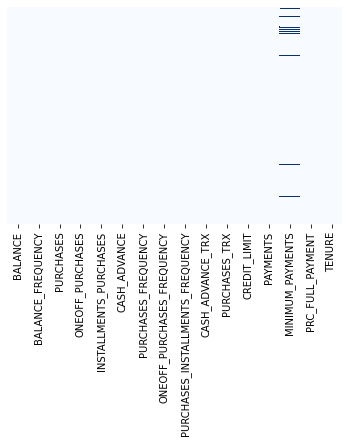

In [48]:
sns.heatmap(data.isnull(),yticklabels = False,cbar = False, cmap = 'Blues')

In [50]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Let's fill the missing values with the average values

In [53]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull() == True),'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].mean()

In [54]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [55]:
data.loc[(data['CREDIT_LIMIT'].isnull() == True),'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].mean()

In [56]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

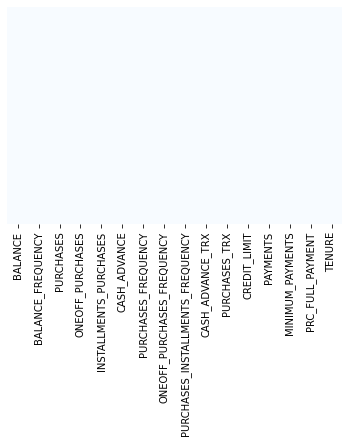

In [57]:
sns.heatmap(data.isnull(),yticklabels = False,cbar = False, cmap = 'Blues')

In [63]:
n = len(data.columns)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

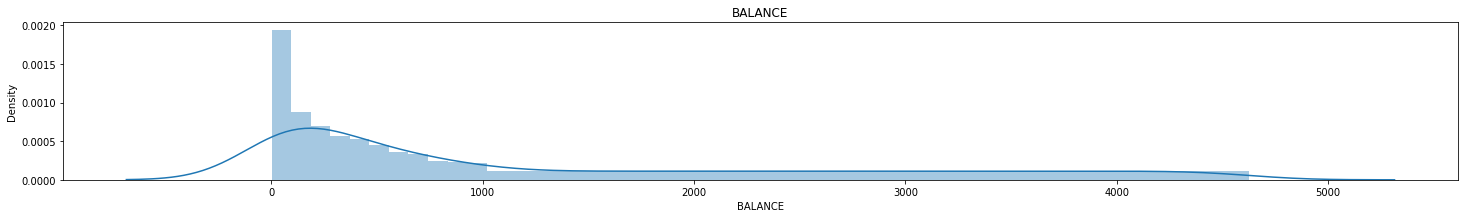

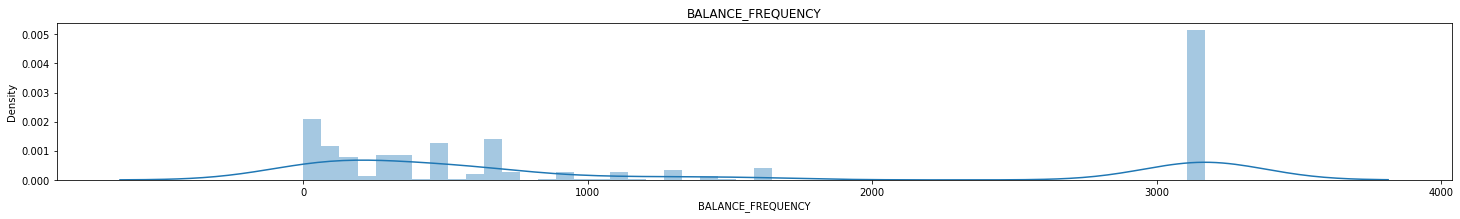

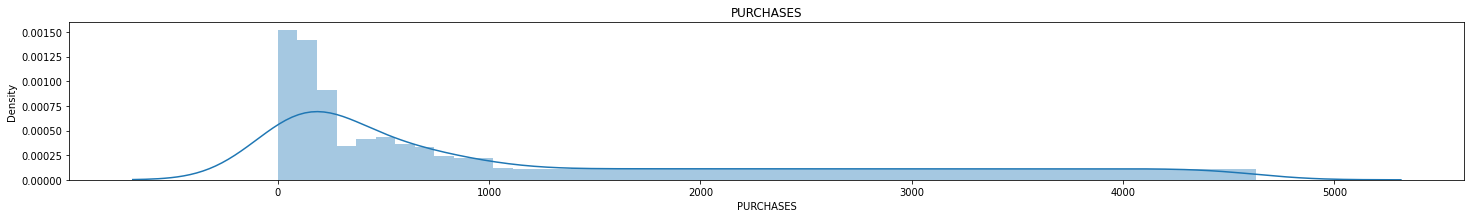

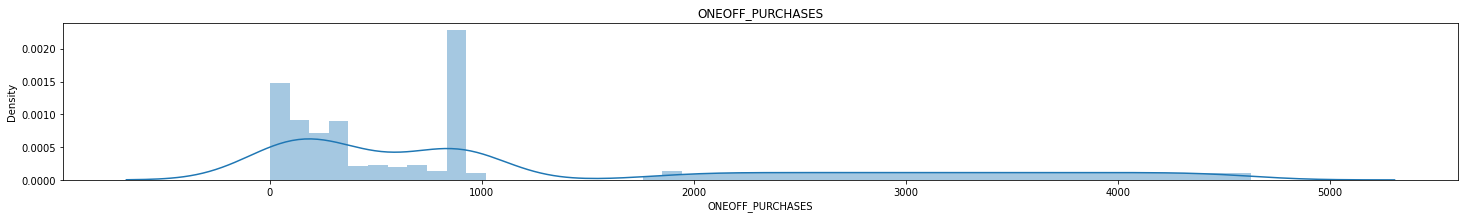

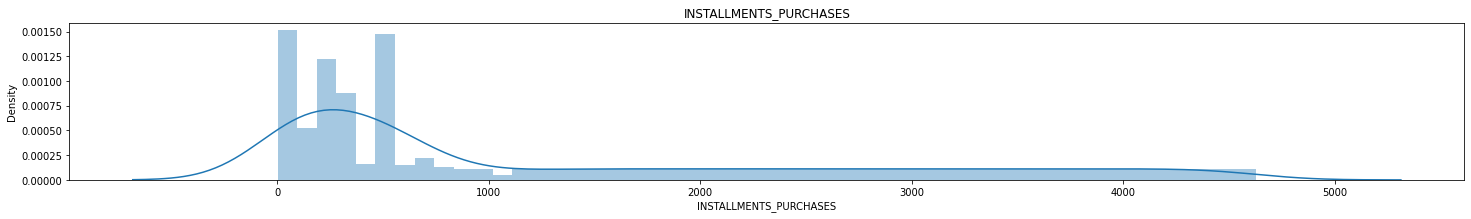

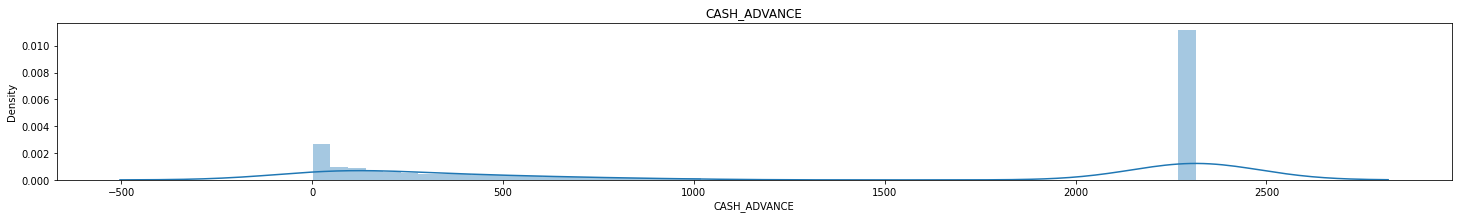

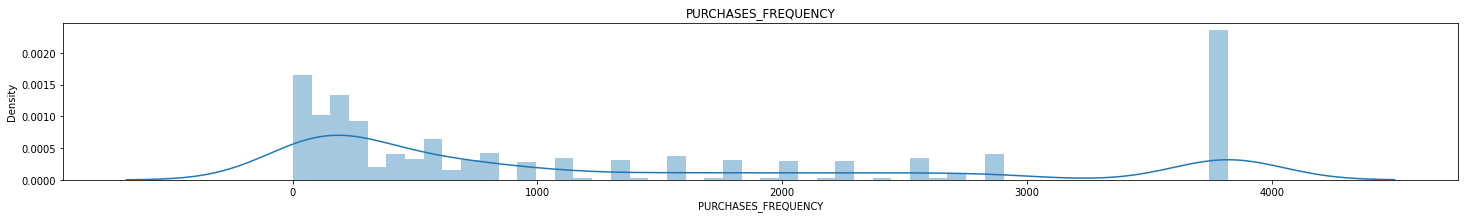

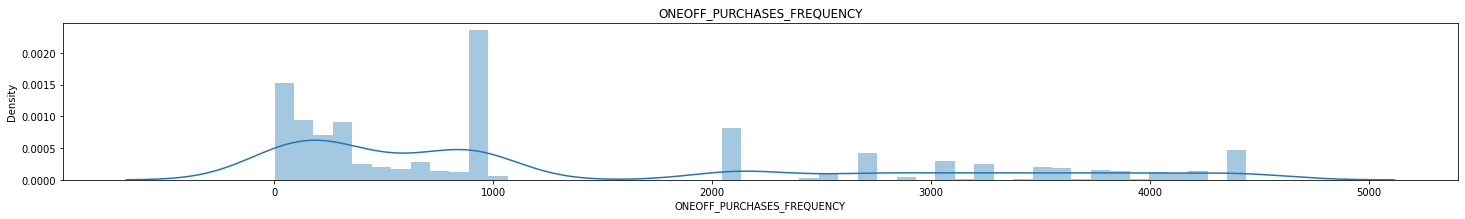

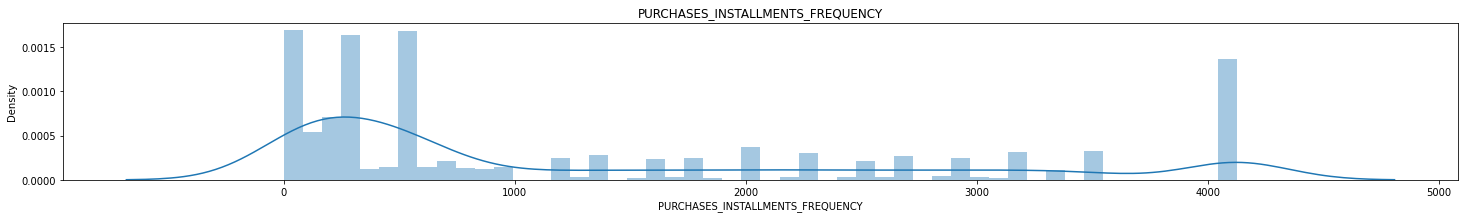

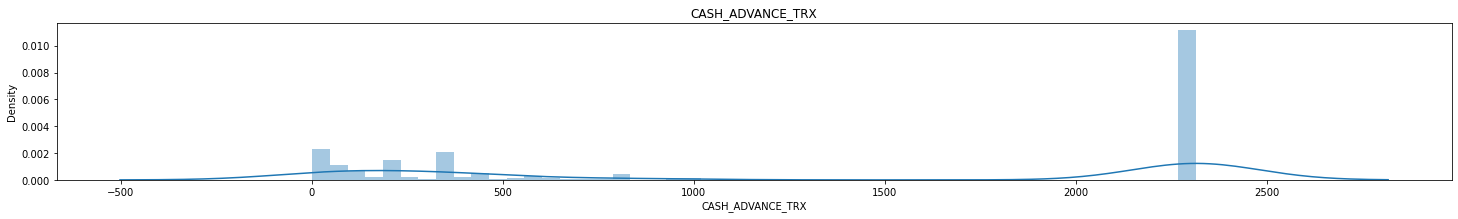

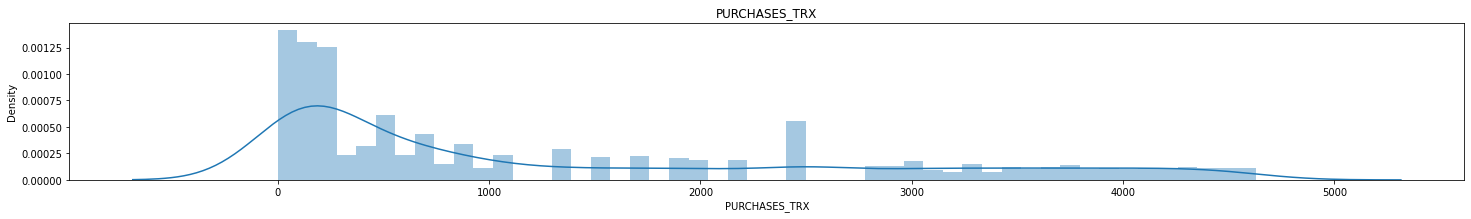

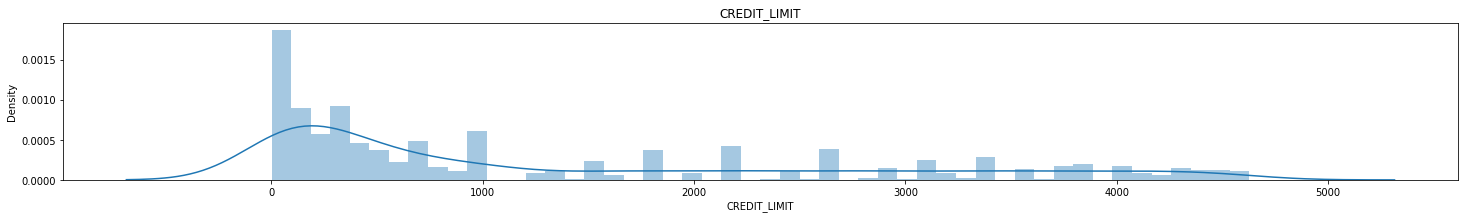

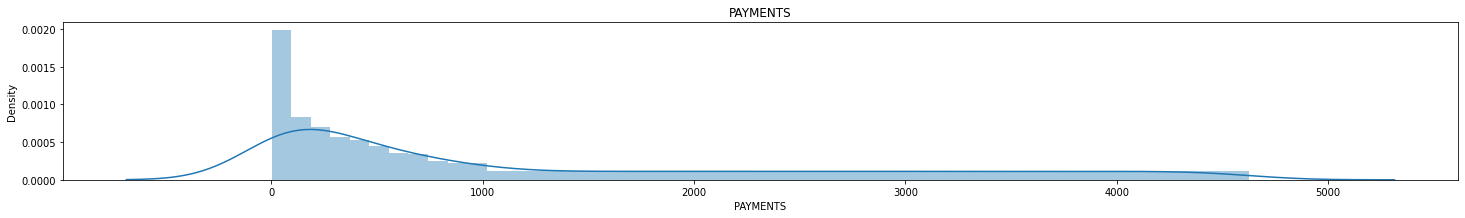

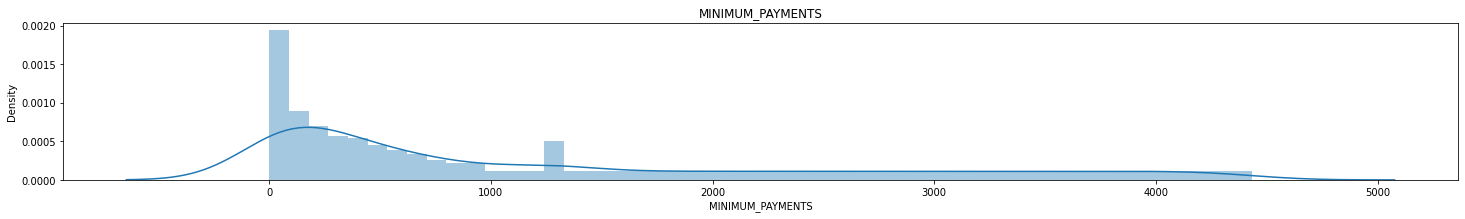

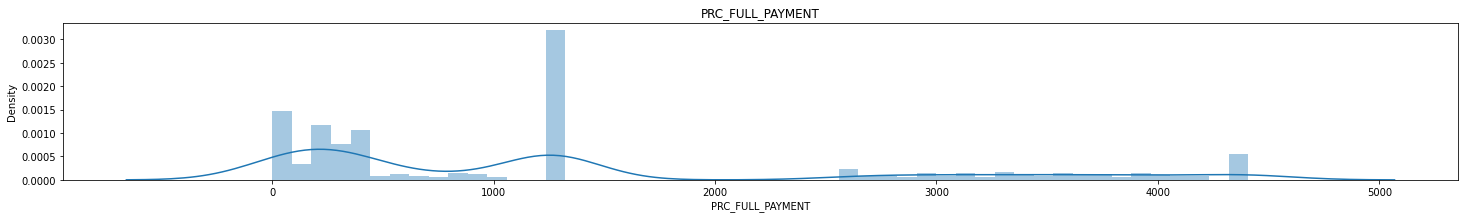

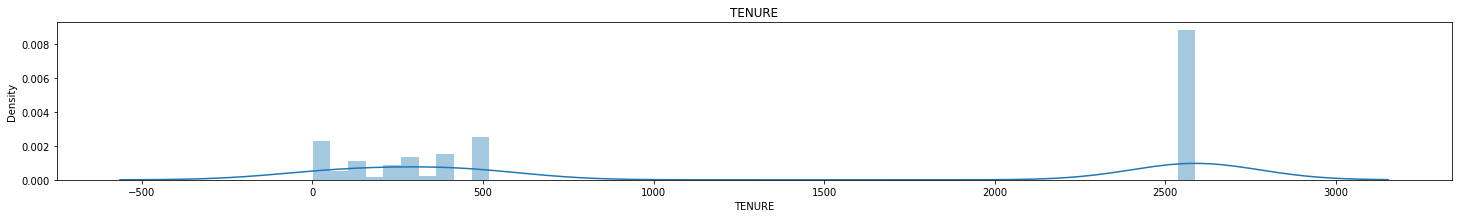

In [106]:
for i in range(n):
  plt.figure(figsize=(25,55))
  plt.subplot(16, 1, i+1)
  sns.distplot(bins = 50, kde = True, a= data[data.columns[i]])
  plt.title(data.columns[i])

count    8950.000000
mean     1327.177542
std      1413.441650
min         1.000000
25%       182.000000
50%       645.000000
75%      2390.750000
max      4628.000000
Name: PURCHASES, dtype: float64

In [108]:
correlations = data.corr()

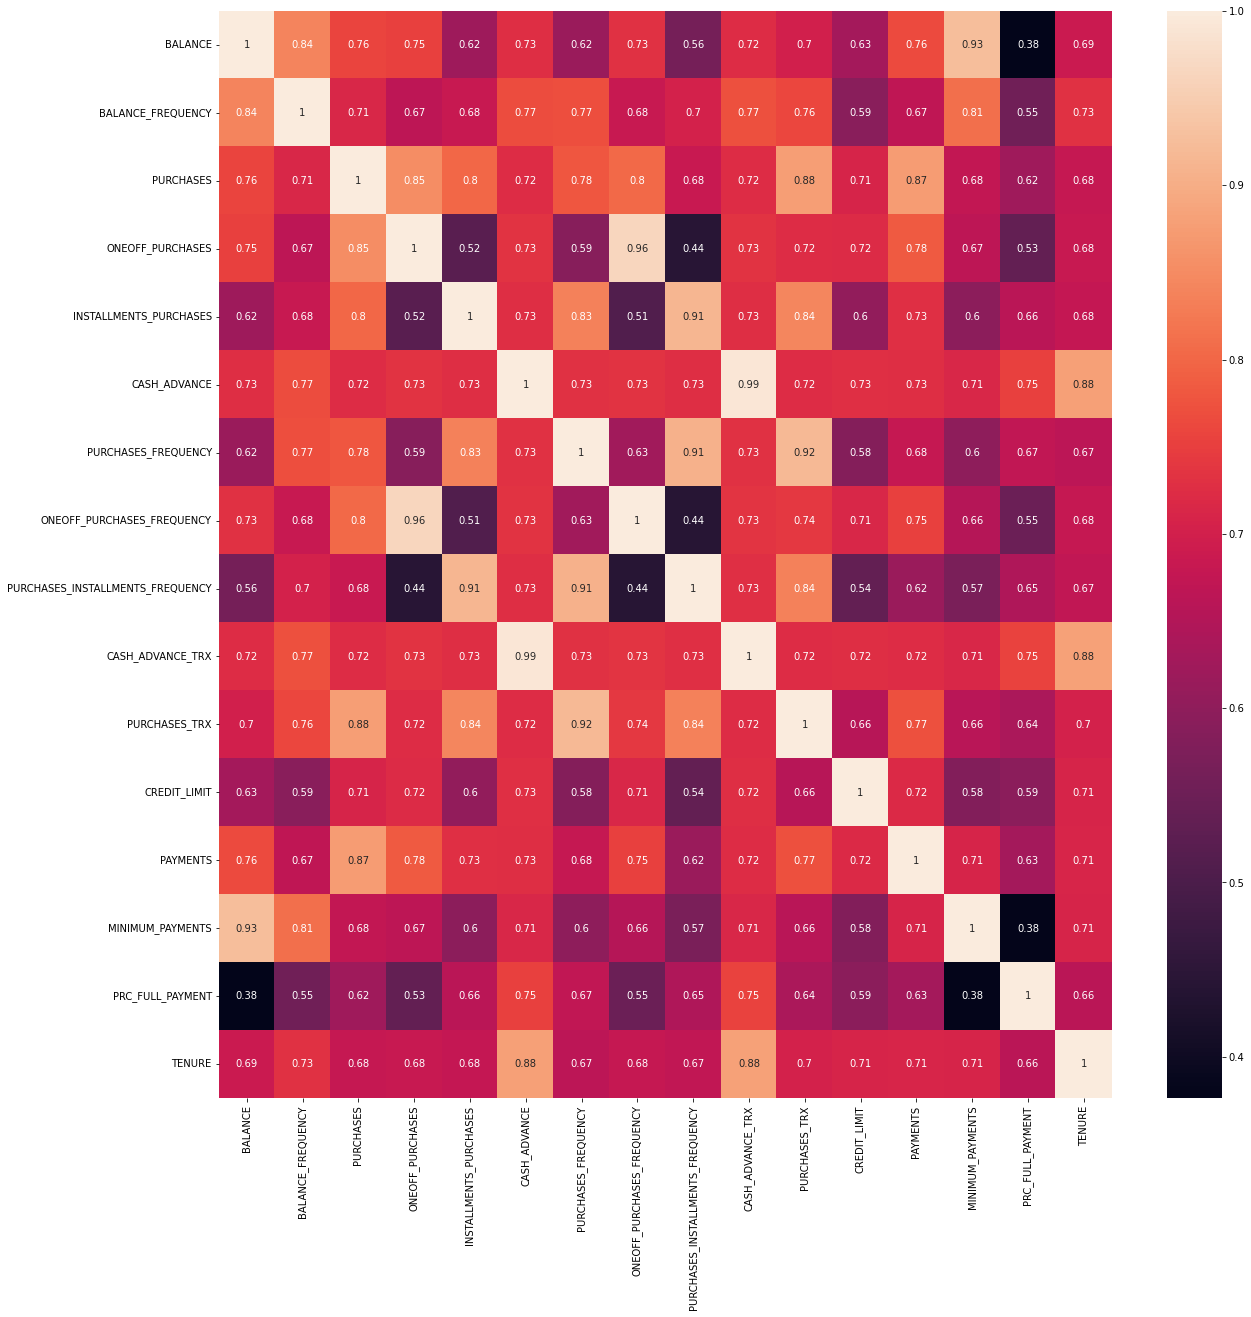

In [110]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot = True)

Let's apply K-means in order to cluster the data

# Finding the best K number with the Elbow Method

In [111]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [112]:
data_scaled.shape

(8950, 16)

In [113]:
data_scaled

array([[-0.13803467, -0.02274878, -0.61567887, ..., -0.12649572,
        -0.046933  ,  1.08482087],
       [-0.633093  , -0.93337717, -0.84244303, ..., -0.65024803,
        -0.57502332, -0.87862863],
       [ 2.07416886,  1.38880061,  0.91825154, ...,  1.80121421,
        -0.046933  ,  1.08482087],
       ...,
       [-0.37990603,  0.0533882 , -0.44162588, ..., -0.64421922,
         1.31180322, -1.10577616],
       [-0.93295691, -0.89832401, -0.8102503 , ..., -0.9411378 ,
        -0.44604103, -1.12126349],
       [-0.92164129, -0.98237621, -0.68218692, ..., -0.950181  ,
        -0.84441203, -1.12986757]])

In [115]:
score_1 = []

range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(data_scaled)
  score_1.append(kmeans.inertia_)

Text(0, 0.5, 'Score WCSS')

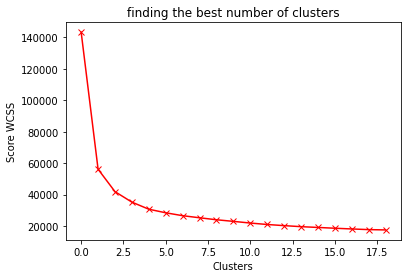

In [118]:
plt.plot(score_1, 'rx-')
plt.title('finding the best number of clusters')
plt.xlabel('Clusters')
plt.ylabel("Score WCSS")

# Applying Kmeans for 4 Clusters

In [120]:
kmeans = KMeans(4)
kmeans.fit(data_scaled)
labels = kmeans.labels_

In [121]:
labels

array([2, 0, 3, ..., 1, 0, 0], dtype=int32)

In [122]:
labels.shape

(8950,)

In [124]:
labels.max()

3

In [125]:
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1132.0,1297.0,457.0,900.5,1499.0,2314.5,575.5,900.5,1163.5,2314.5,503.0,314.0,691.0,1096.000000,1263.5,2588.0
1,432.0,89.0,136.5,161.5,198.5,562.0,136.5,161.5,198.5,229.5,136.5,446.0,505.0,401.000000,547.0,306.0
2,4260.0,3169.5,2625.0,3388.5,536.5,2314.5,3821.5,4440.5,536.0,2314.5,2498.0,3871.0,2139.0,3654.000000,1263.5,2588.0
3,672.0,152.0,863.0,931.0,320.0,390.0,517.5,669.5,320.0,365.0,504.0,853.5,19.0,1263.855158,380.5,511.0
4,3261.0,3169.5,27.5,1824.5,536.5,2314.5,192.5,2128.5,536.0,2314.5,197.0,663.0,2254.0,2899.000000,1263.5,2588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,907.0,3169.5,1352.0,900.5,2442.0,2314.5,3821.5,900.5,3180.0,2314.5,1301.5,314.0,1189.0,172.000000,3551.0,42.0
8946,677.0,3169.5,1390.5,900.5,2476.0,2314.5,3821.5,900.5,3180.0,2314.5,1301.5,314.0,974.0,1263.855158,1263.5,42.0
8947,790.0,1398.0,703.0,900.5,1764.0,2314.5,2536.0,900.5,2711.0,2314.5,1084.5,314.0,245.0,409.000000,3107.0,42.0
8948,8.0,135.5,182.0,223.0,249.5,3.0,182.0,223.0,249.5,190.5,182.0,9.5,34.0,15.000000,722.0,24.0


In [126]:
data_cluster = pd.concat([data,pd.DataFrame({'Cluster':labels})],axis = 1)
data_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,1132.0,1297.0,457.0,900.5,1499.0,2314.5,575.5,900.5,1163.5,2314.5,503.0,314.0,691.0,1096.000000,1263.5,2588.0,2
1,432.0,89.0,136.5,161.5,198.5,562.0,136.5,161.5,198.5,229.5,136.5,446.0,505.0,401.000000,547.0,306.0,0
2,4260.0,3169.5,2625.0,3388.5,536.5,2314.5,3821.5,4440.5,536.0,2314.5,2498.0,3871.0,2139.0,3654.000000,1263.5,2588.0,3
3,672.0,152.0,863.0,931.0,320.0,390.0,517.5,669.5,320.0,365.0,504.0,853.5,19.0,1263.855158,380.5,511.0,0
4,3261.0,3169.5,27.5,1824.5,536.5,2314.5,192.5,2128.5,536.0,2314.5,197.0,663.0,2254.0,2899.000000,1263.5,2588.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,907.0,3169.5,1352.0,900.5,2442.0,2314.5,3821.5,900.5,3180.0,2314.5,1301.5,314.0,1189.0,172.000000,3551.0,42.0,1
8946,677.0,3169.5,1390.5,900.5,2476.0,2314.5,3821.5,900.5,3180.0,2314.5,1301.5,314.0,974.0,1263.855158,1263.5,42.0,1
8947,790.0,1398.0,703.0,900.5,1764.0,2314.5,2536.0,900.5,2711.0,2314.5,1084.5,314.0,245.0,409.000000,3107.0,42.0,1
8948,8.0,135.5,182.0,223.0,249.5,3.0,182.0,223.0,249.5,190.5,182.0,9.5,34.0,15.000000,722.0,24.0,0


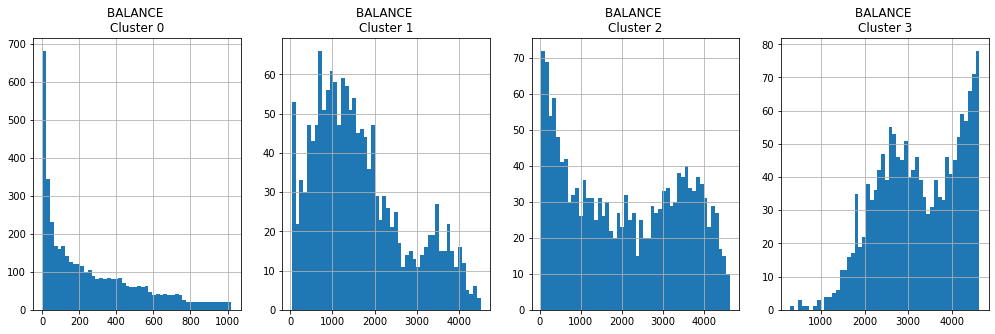

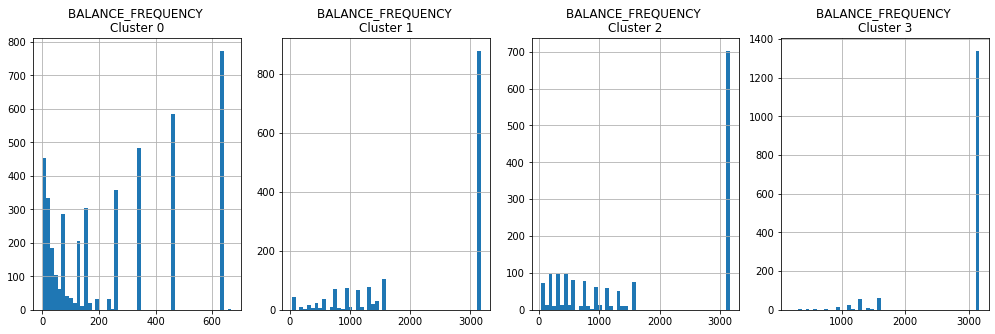

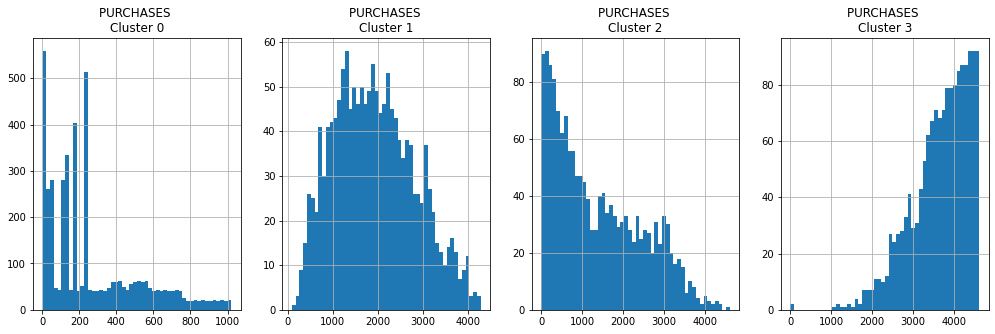

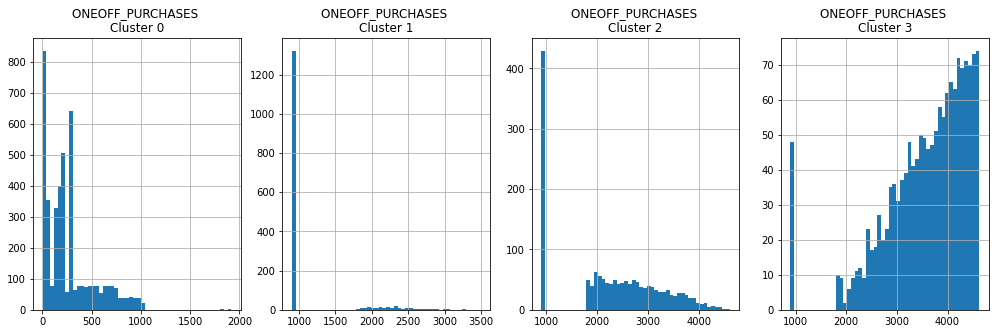

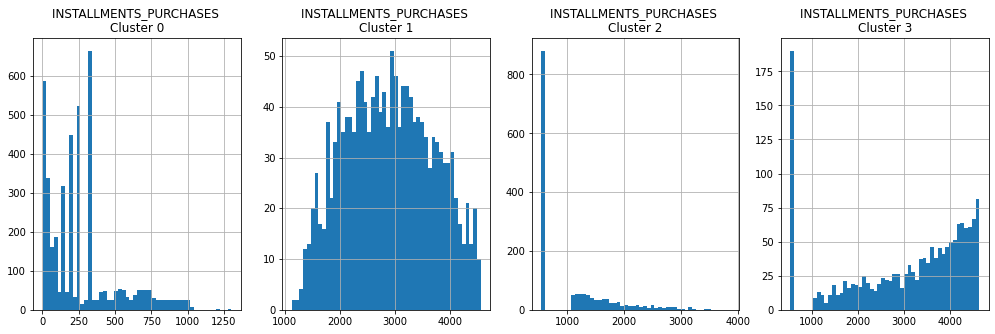

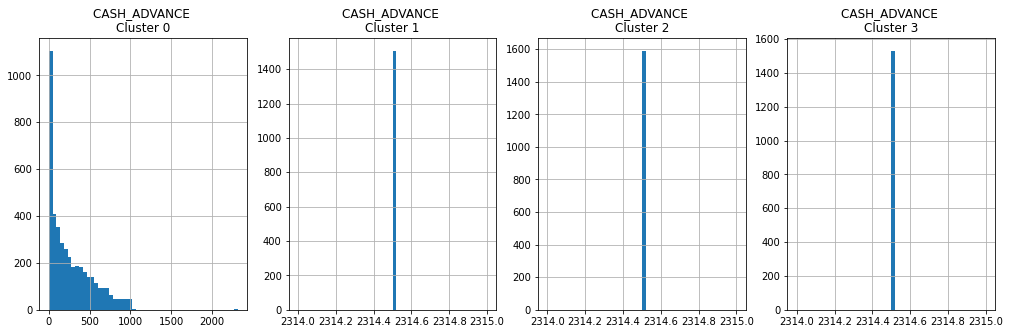

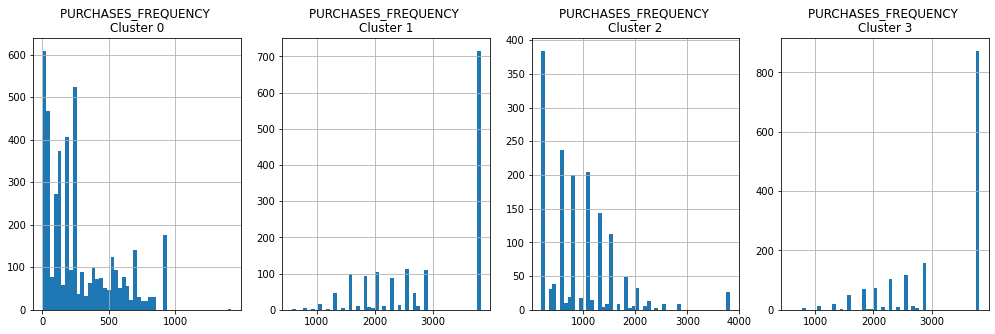

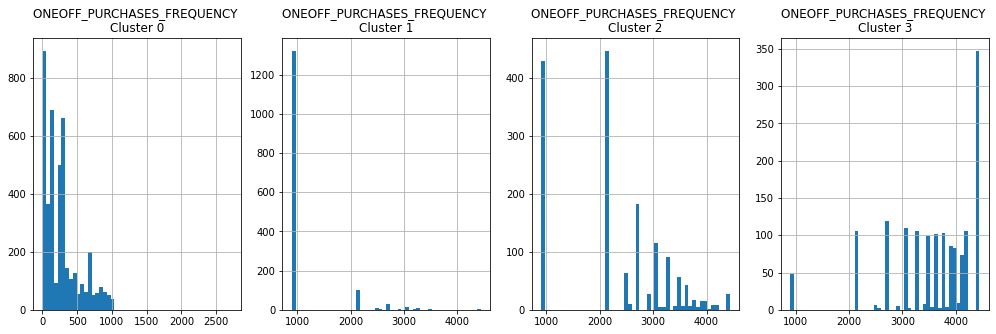

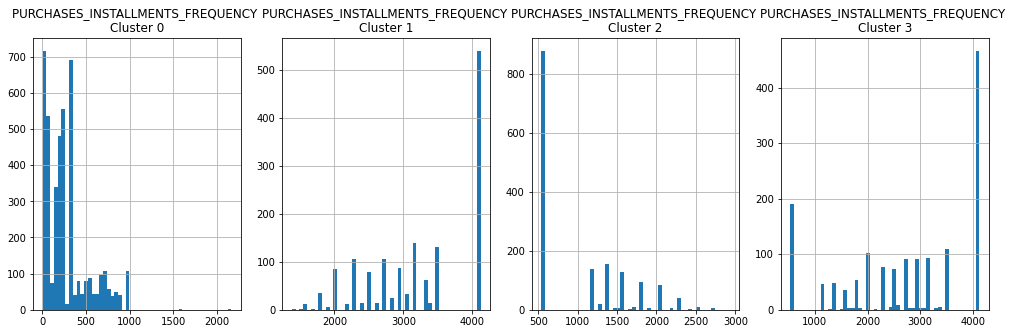

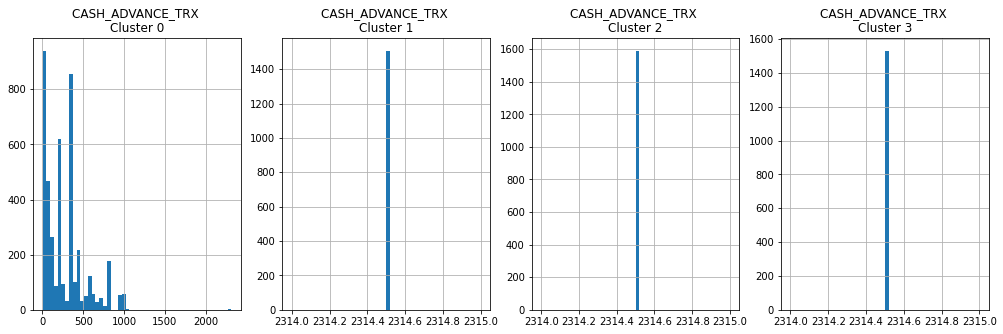

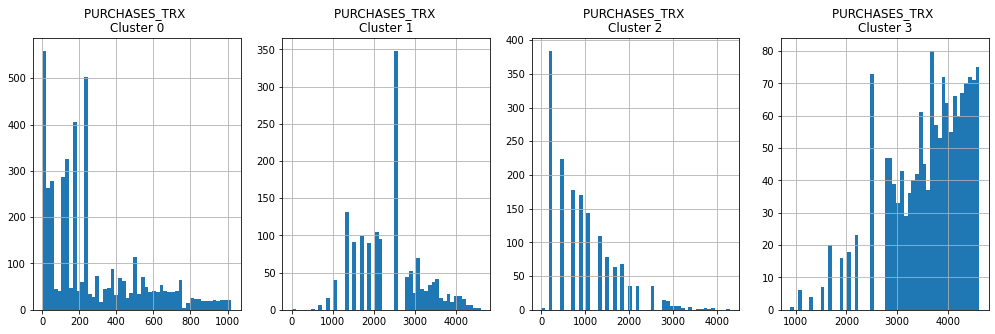

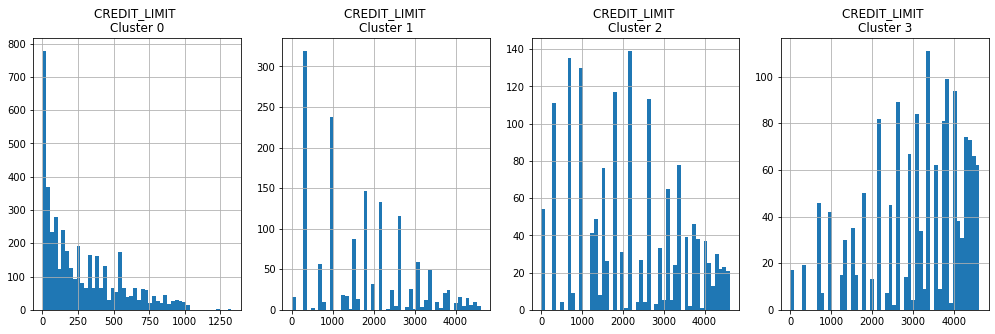

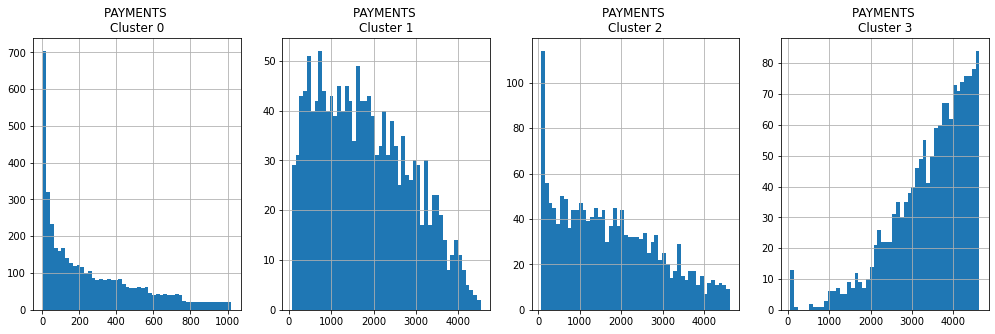

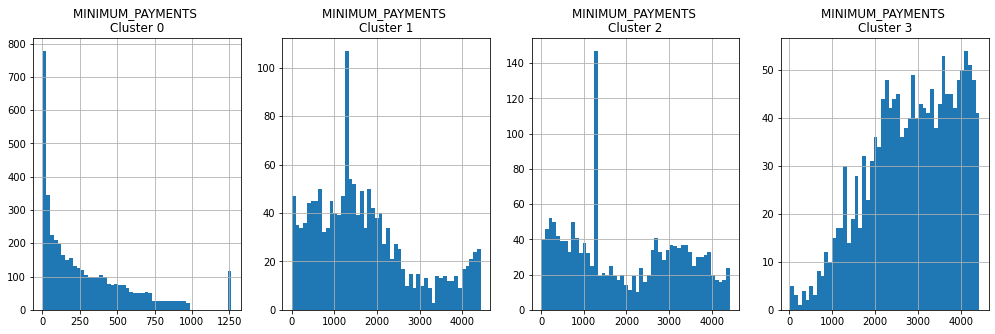

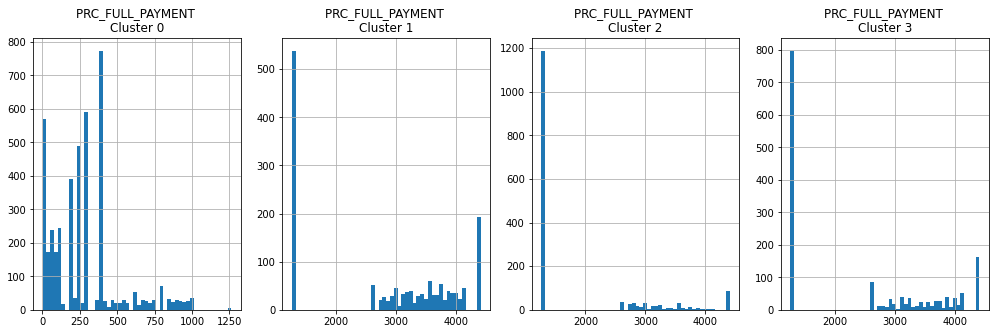

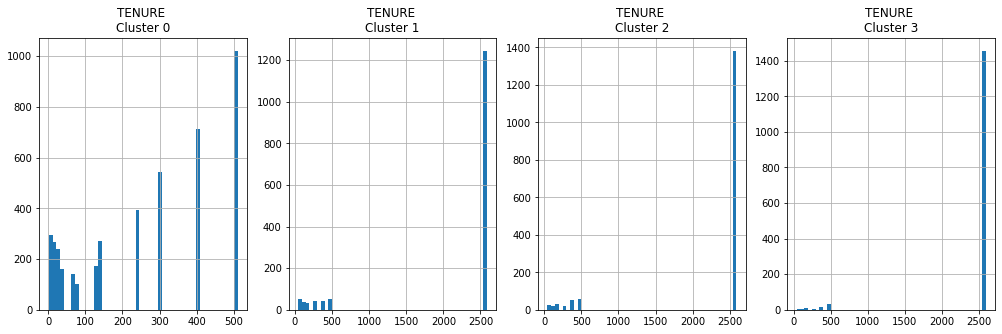

In [127]:
for i in data.columns:
  plt.figure(figsize=(35,5))
  for j in  range(4):
    plt.subplot(1,8,j+1)
    cluster = data_cluster[data_cluster['Cluster'] == j]
    cluster[i].hist(bins=50)
    plt.title('{} \nCluster {}'.format(i,j))

Now we can analyze the features for each cluster individually